# 1.5 Data Sets

## Housing Data Set

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

data, target = load_boston(True)
bostonDF = pd.DataFrame(data, columns=load_boston().feature_names)
bostonDF['label'] = target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Game Purchases

In [2]:
gamesDF = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")
gamesDF.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


## Big Query

In [3]:
from google.cloud import bigquery
client = bigquery.Client()

sql = """
  SELECT * 
  FROM  `bigquery-public-data.samples.natality`
  limit 10
"""

natalityDF = client.query(sql).to_dataframe()
natalityDF.head()

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,...,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,1970,1970,9,4,None,HI,True,7,7.625790,NaN,...,None,None,None,7,0,0,8,7,46,2
1,1971,1971,6,2,None,HI,False,6,7.438397,1.0,...,None,None,None,11,0,0,12,6,47,2
2,1972,1972,11,27,None,HI,False,7,8.437091,1.0,...,None,None,None,12,0,0,13,7,48,2
3,1972,1972,11,10,None,HI,True,7,7.374463,1.0,...,None,None,None,6,0,3,10,7,34,2
4,1973,1973,12,26,None,HI,False,7,5.813590,1.0,...,None,None,None,8,0,1,10,7,49,2


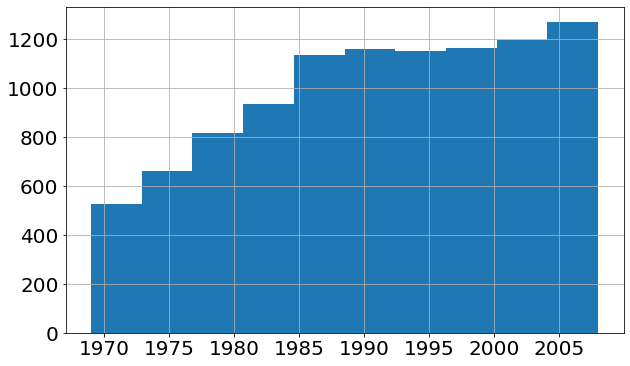

In [9]:
natalityDF = client.query("""
  SELECT year
  FROM  `bigquery-public-data.samples.natality`
  order by rand()
  limit 10000
""").to_dataframe()

natalityDF['year'].hist(figsize = (10, 6), ylabelsize = 20, xlabelsize = 20)


## Kaggle 

In [5]:
import pandas as pd
nhlDF = pd.read_csv('game.csv') 
nhlDF.head()


,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


# 1.6 Prototype Models

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd

# load Boston housing data set 
data, target = load_boston(True)
bostonDF = pd.DataFrame(data, columns=load_boston().feature_names)
bostonDF['label'] = target

# create train and test splits of the housing data set 
x_train, x_test, y_train, y_test = train_test_split(bostonDF.drop(['label'], axis=1), bostonDF['label'], test_size=0.33)

# train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# print results 
print("R^2: " + str(model.score(x_test, y_test)))
print("Mean Error: " + str(sum(abs(y_test - model.predict(x_test) ))/y_test.count()))


R^2: 0.6782455627123873
Mean Error: 3.2663365637402775


## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd

gamesDF = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")

# create train and test splits of the game data set 
x_train, x_test, y_train, y_test = train_test_split(gamesDF.drop(['label'], axis=1), gamesDF['label'], test_size=0.33)

# train a linear regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# print results 
print("Accuracy: " + str(model.score(x_test, y_test)))
print("ROC: " + str(roc_auc_score(y_test, model.predict_proba(x_test)[:, 1] )))


Accuracy: 0.868501124487366
ROC: 0.7516323389377122


/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Keras Regression

In [10]:
import tensorflow as tf
import keras
from keras import models, layers
import matplotlib.pyplot as plt
keras.__version__

/home/ec2-user/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ec2-user/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

'2.2.4'

In [11]:
# create train and test splits of the game data set 
x_train, x_test, y_train, y_test = train_test_split(gamesDF.drop(['label'], axis=1), gamesDF['label'], test_size=0.33)

# define the network strcuture 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# define ROC AUC as a metric 
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc
    
# compile and fit the model    
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[auc])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split = .2, verbose=0)


W0804 22:35:51.524632 139785758517056 deprecation_wrapper.py:119] From /home/ec2-user/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 22:35:51.538296 139785758517056 deprecation_wrapper.py:119] From /home/ec2-user/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 22:35:51.541135 139785758517056 deprecation_wrapper.py:119] From /home/ec2-user/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 22:35:51.556861 139785758517056 deprecation_wrapper.py:119] From /home/ec2-user/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_w

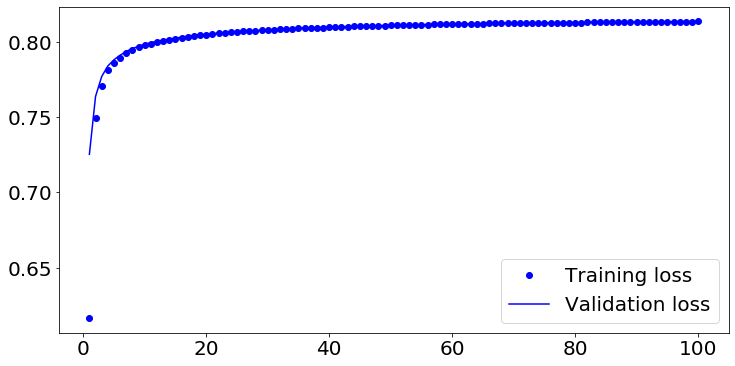

In [12]:
loss = history.history['auc']
val_loss = history.history['val_auc']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12,6) )
plt.rcParams.update({'font.size': 20})
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()


In [13]:
results = model.evaluate(x_test, y_test, verbose = 0)
print("ROC: " + str(results[1]))


ROC: 0.8133713707026232


# 1.7 Feature Engineering

In [1]:
import pandas as pd

game_df = pd.read_csv("game.csv")
plays_df = pd.read_csv("game_plays.csv")

plays_df = plays_df.drop(['secondaryType', 'periodType', 
                 'dateTime', 'rink_side'], axis=1).fillna(0)


In [2]:
import featuretools as ft
from featuretools import Feature 

es = ft.EntitySet(id="plays")
es = es.entity_from_dataframe(entity_id="plays", dataframe=plays_df, index="play_id",
           variable_types = { "event": ft.variable_types.Categorical, 
                             "description": ft.variable_types.Categorical })       

f1 = Feature(es["plays"]["event"])
f2 = Feature(es["plays"]["description"])

encoded, defs = ft.encode_features(plays_df, [f1, f2], top_n=10)
encoded.reset_index(inplace=True)
encoded.head()

,index,event = Faceoff,event = Shot,event = Hit,event = Stoppage,event = Blocked Shot,event = Missed Shot,event = Giveaway,event = Takeaway,event = Penalty,...,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
2,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
3,3,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
4,4,0,0,0,0,0,0,1,0,0,...,1.0,28.0,24.0,1,21,1179,0,0,-28.0,-24.0


In [3]:
es = ft.EntitySet(id="plays")
es = es.entity_from_dataframe(entity_id="plays", dataframe=encoded, index="play_id")
es = es.normalize_entity(base_entity_id="plays",new_entity_id="games", index="game_id")

features,transform=ft.dfs(entityset=es,target_entity="games",max_depth=2)
features.reset_index(inplace=True)
features.head()


,game_id,SUM(plays.index),SUM(plays.event = Faceoff),SUM(plays.event = Shot),SUM(plays.event = Hit),SUM(plays.event = Stoppage),SUM(plays.event = Blocked Shot),SUM(plays.event = Missed Shot),SUM(plays.event = Giveaway),SUM(plays.event = Takeaway),...,MEAN(plays.x),MEAN(plays.y),MEAN(plays.period),MEAN(plays.periodTime),MEAN(plays.periodTimeRemaining),MEAN(plays.goals_away),MEAN(plays.goals_home),MEAN(plays.st_x),MEAN(plays.st_y),COUNT(plays)
0,2010020001,1097336604,43,47,61,31,43,24,23,13,...,-6.016026,0.185897,1.939103,591.794872,608.205128,1.019231,1.993590,0.246795,-1.391026,312
1,2010020002,1100541237,56,53,66,44,30,28,20,10,...,5.086053,-0.252226,1.949555,576.124629,623.875371,1.178042,0.545994,10.931751,0.056380,337
2,2010020003,1088867005,85,53,33,65,38,17,22,11,...,-4.735211,1.042254,1.960563,606.757746,593.242254,2.002817,1.473239,6.267606,1.194366,355
3,2010020004,1085722191,60,72,37,46,26,15,14,28,...,3.555556,-1.240240,2.069069,587.099099,569.657658,1.519520,1.795796,6.735736,0.681682,333
4,2010020005,1256544235,60,66,49,44,37,33,28,17,...,-6.440541,1.186486,1.967568,613.672973,586.327027,0.000000,1.635135,8.943243,0.143243,370


In [4]:
import framequery as fq

# assign labels to the generated features
features = fq.execute("""
  SELECT f.*, case when g.type = 'P' then 1 else 0 end as label
  FROM features f 
  JOIN game_df g
    on f.game_id = g.game_id
""")


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# create inputs for sklearn
y = features['label']
X = features.drop(['label', 'game_id'], axis=1).fillna(0)

# train a classifier 
lr = LogisticRegression()
model = lr.fit(X, y)

# Results
print("Accuracy: " + str(model.score(X, y)))
print("ROC: " + str(roc_auc_score(y, model.predict_proba(X)[:, 1] )))

/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9472607612949129
ROC: 0.9233913450657509
